Романовский А. Н. 30.11.2022

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics.cluster import v_measure_score
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

### 1. Загрузите данные. 
* Добейтесь, чтобы в переменной `X` оказался массив наблюдений, содержащий 1797 $\times$ 64 числа, а в переменной `y` – массив истинных меток классов, содержащий 1797 чисел.

In [2]:
digits = load_digits()

In [3]:
digits['data'].shape

(1797, 64)

In [4]:
digits['target'].shape

(1797,)

In [5]:
x = digits['data']

In [6]:
y = digits['target']

#### Визуализируйте первые десять картинок 
* Расположив их на сетке 3 × 4 (в последнем ряду останутся пустые места). Добейтесь, чтобы фон картинок был белым, а изображения цифр – тёмными.

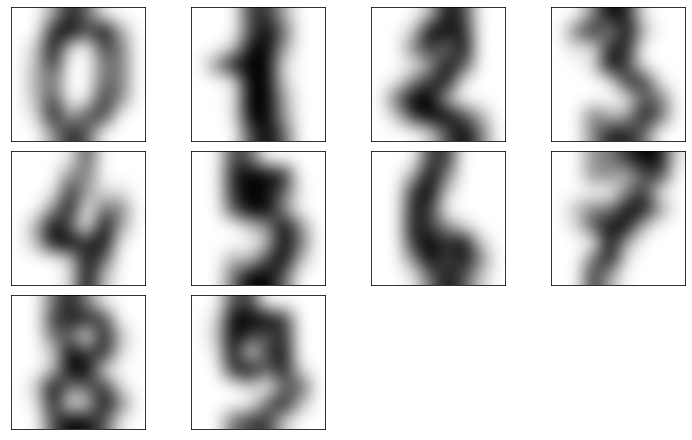

In [7]:
plt.figure(figsize=(10, 6), constrained_layout=True)
for i in range(0, 10):
    plt.subplot(3, 4, i + 1, xticks = [], yticks = [])
    #plt.axis('off')
    plt.imshow(x[i].reshape([8,8]),  interpolation= 'bicubic', cmap=plt.cm.gray_r);  

### 2. Кластеризация и оценка качества

* Используя иерархическую кластеризацию и 𝐾 средних, получите разбиение массива X на 10 кластеров.

In [8]:
kmeans = KMeans(n_clusters=10, n_init = 100)
y_kmeans = kmeans.fit_predict(x)
np.unique(y_kmeans)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
clustering = AgglomerativeClustering(n_clusters = 10)
y_clustering = clustering.fit_predict(x)
np.unique(y_clustering)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

* Визуализируйте центры кластеров, полученных каждым из двух способов. Это опять должны быть картинки на сетке 3 × 4 с белым фоном и тёмными контурами. 

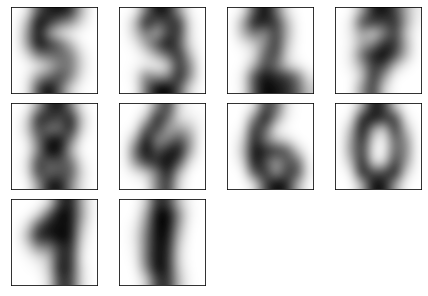

In [10]:
plt.figure(figsize=(6, 4), constrained_layout=True)
for i in range(0, 10):
    plt.subplot(3, 4, i + 1, xticks = [], yticks = [])
    plt.imshow(np.mean(x[y_clustering==i],axis=0).reshape(8,8),  interpolation= 'bicubic', cmap=plt.cm.gray_r);  

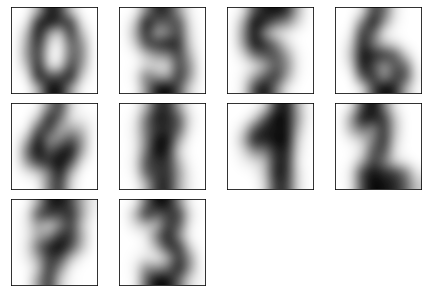

In [11]:
plt.figure(figsize=(6, 4), constrained_layout=True)
for i in range(0, 10):
    plt.subplot(3, 4, i + 1, xticks = [], yticks = [])
    plt.imshow(np.mean(x[y_kmeans==i],axis=0).reshape(8,8),  interpolation= 'bicubic', cmap=plt.cm.gray_r); 

* Прокомментируйте: какой из двух алгоритмов даёт центры кластеров, больше похожие на типичные начертания цифр?
_____
Визуально оба алгоритма дают практически одинаковые результаты. Цифры разборчивы в двух ситуациях

* Для числа 𝐾 от 2 до 20 включительно получите разбиение массива X на 𝐾 кластеров каждым из двух методов. Посчитайте силуэт. Посчитанные значения силуэта сохраните в переменную и визуализируйте в виде графика в координатах: число 𝐾 – значение силуэта. При каком числе кластеров достигается максимум силуэта?

In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(x)

In [13]:
#X_scaled = x

In [14]:
km_silhouette = []
agg_clustering_silhouette = []

for i in range(2,21):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    silhouette = silhouette_score(X_scaled, preds)
    km_silhouette.append(silhouette)
    
    
    clustering = AgglomerativeClustering(n_clusters = i).fit(X_scaled)
    predict = clustering.fit_predict(X_scaled)
    agg_silhouette = silhouette_score(X_scaled, predict)
    agg_clustering_silhouette.append(agg_silhouette)
    
    print("Cluster number {}: Agglomerative_Silhouette score {}".format(i,agg_silhouette))
    print("Cluster number {}: Kmeans_Silhouette score {}".format(i,silhouette))
    print('_'*40)

Cluster number 2: Agglomerative_Silhouette score 0.11789115786376413
Cluster number 2: Kmeans_Silhouette score 0.11943210390295135
________________________________________
Cluster number 3: Agglomerative_Silhouette score 0.11003570155202355
Cluster number 3: Kmeans_Silhouette score 0.12537851310016052
________________________________________
Cluster number 4: Agglomerative_Silhouette score 0.1069144433864155
Cluster number 4: Kmeans_Silhouette score 0.12707355067903112
________________________________________
Cluster number 5: Agglomerative_Silhouette score 0.11664718917297694
Cluster number 5: Kmeans_Silhouette score 0.13678946629963
________________________________________
Cluster number 6: Agglomerative_Silhouette score 0.13374128330757012
Cluster number 6: Kmeans_Silhouette score 0.14973729076956593
________________________________________
Cluster number 7: Agglomerative_Silhouette score 0.1510158329569802
Cluster number 7: Kmeans_Silhouette score 0.16244393018841607
______________

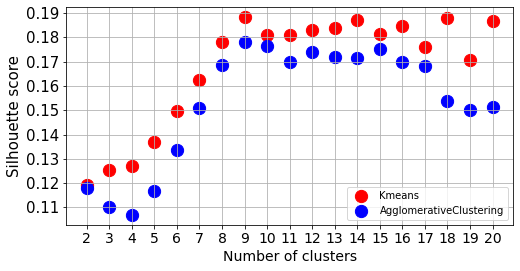

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(x=[i for i in range(2,21)],y=km_silhouette,s=150, color = 'r', label='Kmeans')
plt.scatter(x=[i for i in range(2,21)],y=agg_clustering_silhouette,s=150, color = 'b', label='AgglomerativeClustering')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.legend(loc = 'lower right')
plt.yticks(fontsize=15)

plt.show()

_____
    Максимальное значение Silhouette 0,188 для алгоритма Kmeans при разбиении на 9 кластеров
    Максимальное значение Silhouette 0.1782 для алгоритма AgglomerativeClustering при разбиении на 9 кластеров
____

* Повторите предыдущее задание, используя 𝑉-меру вместо силуэта. При каком числе кластеров достигается максимум 𝑉-меры?

In [16]:
#X_scaled = x

In [17]:
km_homogeneity = []
agg_clustering_homogeneity = []
print('_'*38, 'homogeneity    ',   '     completeness','      v_measure')
for i in range(2,21):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    pred = km.predict(X_scaled)
    homogeneity = homogeneity_completeness_v_measure(y, pred)
    km_homogeneity.append(homogeneity)
    
    clustering = AgglomerativeClustering(n_clusters = i).fit(X_scaled)
    predict = clustering.fit_predict(X_scaled)
    agg_homogeneity = homogeneity_completeness_v_measure(y, predict)
    agg_clustering_homogeneity.append(agg_homogeneity)
    
    print("Cluster number {}: Agglomerative_model {}".format(i,agg_homogeneity))
    print("Cluster number {}: Kmeans_model        {}".format(i,homogeneity))
    print('_'*40)

______________________________________ homogeneity          completeness       v_measure
Cluster number 2: Agglomerative_model (0.25818781836327476, 0.9747507265121849, 0.4082421862342204)
Cluster number 2: Kmeans_model        (0.23184085045424743, 0.8580043142648923, 0.36504350590728013)
________________________________________
Cluster number 3: Agglomerative_model (0.41814615892149093, 0.8826547096029856, 0.5674637608339015)
Cluster number 3: Kmeans_model        (0.31331627060643513, 0.6612905566091402, 0.4251829254592324)
________________________________________
Cluster number 4: Agglomerative_model (0.5005887498078059, 0.9000488222630958, 0.6433560311201815)
Cluster number 4: Kmeans_model        (0.36892440289421147, 0.6143840562249372, 0.4610176369143668)
________________________________________
Cluster number 5: Agglomerative_model (0.5973282090866209, 0.8856810729585931, 0.7134713120644431)
Cluster number 5: Kmeans_model        (0.48542122449194464, 0.7173865714299446, 0.5790362

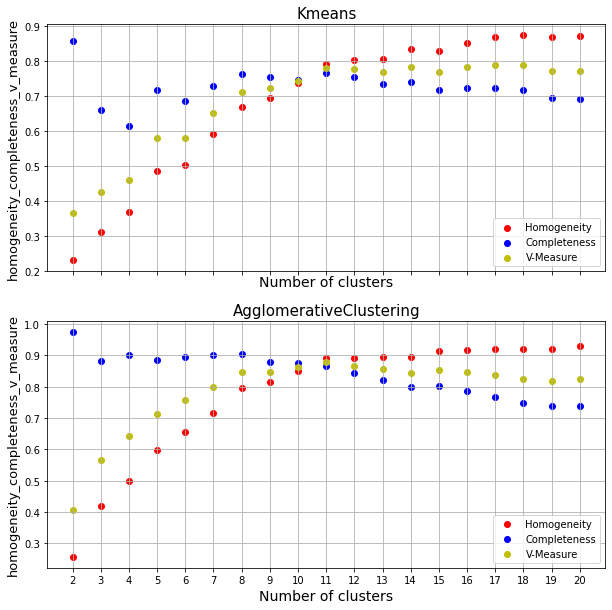

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

axs[0].set_title('Kmeans', fontsize=15)
axs[0].scatter(x=[i for i in range(2,21)],y = [s[0] for s in km_homogeneity], color = 'r', label='Homogeneity')
axs[0].scatter(x=[i for i in range(2,21)],y = [s[1] for s in km_homogeneity], color ='b',  label='Completeness' )
axs[0].scatter(x=[i for i in range(2,21)],y = [s[2] for s in km_homogeneity], color = 'y', label='V-Measure' )


axs[1].set_title('AgglomerativeClustering', fontsize=15)
axs[1].scatter(x=[i for i in range(2,21)],y = [s[0] for s in agg_clustering_homogeneity], color = 'r', label='Homogeneity')
axs[1].scatter(x=[i for i in range(2,21)],y = [s[1] for s in agg_clustering_homogeneity], color ='b',  label='Completeness' )
axs[1].scatter(x=[i for i in range(2,21)],y = [s[2] for s in agg_clustering_homogeneity], color = 'y', label='V-Measure' )
for _ in range(2):
    axs[_].grid(True)
    axs[_].legend()
    axs[_].set_xlabel("Number of clusters",fontsize=14)
    axs[_].set_ylabel("homogeneity_completeness_v_measure",fontsize=13)
    axs[_].set_xticks([i for i in range(2,21)], fontsize=15)


plt.show()

_____   
    На скалированных данных:
    Максимальное значение V-Measure 0.778 для алгоритма Kmeans при разбиении на 11 кластеров
    Максимальное значение V-Measure 0.878 для алгоритма AgglomerativeClustering при разбиении на 11 кластеров
    
    На нескалированных данных:
    Максимальное значение V-Measure 0.783 для алгоритма Kmeans при разбиении на 11 кластеров
    Максимальное значение V-Measure 0.8685 для алгоритма AgglomerativeClustering при разбиении на 12 кластеров
____

### 3. Снижение размерности признакового пространства

Выполните сингулярное разложение матрицы X, оставляя 2, 5, 10, 20 признаков. В каждом случае выполните иерархическую и 𝐾-means кластеризацию преобразованных данных (число кластеров примите равным 10). Посчитайте значения силуэта и 𝑉-меры. Удалось ли при каком-нибудь 𝑑′ получить силуэт и / или 𝑉-меру лучше, чем на исходных данных?

In [19]:
#x = X_scaled
n = [2, 5, 10, 20]
for i in n:
    svd = TruncatedSVD(n_components= i, random_state=42)
    vars()["svd_x"+f'{i}']=svd.fit_transform(X_scaled)

In [20]:
v_measure_svd = []
svd_x_silhouette = []
for i in svd_x2, svd_x5, svd_x10, svd_x20:
    
    km = KMeans(n_clusters=10, random_state=0).fit(i)
    preds = km.predict(i)
    silhouette = silhouette_score(i, preds)
    svd_x_silhouette.append(silhouette)
    
    v_measure = v_measure_score(y, preds)
    v_measure_svd.append(v_measure)
    print(f"Silhouette score {silhouette} ")
    print(f"V_measure score  {v_measure}  ")

Silhouette score 0.3586651399118857 
V_measure score  0.39180554935277734  
Silhouette score 0.3367885153767842 
V_measure score  0.6370441723052865  
Silhouette score 0.2776976525992142 
V_measure score  0.7265545345426508  
Silhouette score 0.21528104611269172 
V_measure score  0.7450873004644224  


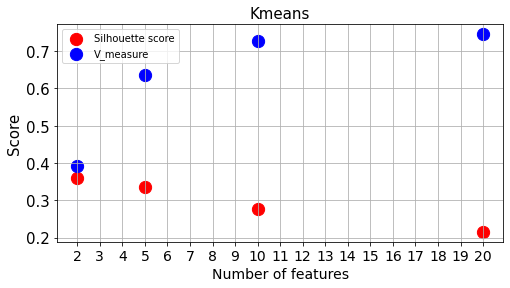

In [21]:
plt.figure(figsize=(8,4))
plt.title('Kmeans', fontsize=15)
plt.scatter(x=[2, 5, 10, 20],y=svd_x_silhouette,s=150, color = 'r', label='Silhouette score')
plt.scatter(x=[2, 5, 10, 20],y=v_measure_svd,s=150, color = 'b', label='V_measure')
plt.grid(True)
plt.xlabel("Number of features",fontsize=14)
plt.ylabel("Score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.legend()
plt.yticks(fontsize=15)

plt.show()

In [22]:
v_measure_svd_agg = []
svd_x_silhouette_agg = []
for i in svd_x2, svd_x5, svd_x10, svd_x20:
    
    clustering = AgglomerativeClustering(n_clusters = 10).fit(i)
    predict = clustering.fit_predict(i)
    silhouette = silhouette_score(i, predict)
    svd_x_silhouette_agg.append(silhouette)
    
    v_measure = v_measure_score(y, predict)
    v_measure_svd_agg.append(v_measure)
    
    print(f"Silhouette score {silhouette} ")
    print(f"V_measure score  {v_measure}  ")

Silhouette score 0.2951536422404763 
V_measure score  0.39083005070025967  
Silhouette score 0.28076830840553024 
V_measure score  0.6307675972626081  
Silhouette score 0.2587529336513205 
V_measure score  0.8316180940394277  
Silhouette score 0.20824712971860693 
V_measure score  0.8577487931903306  


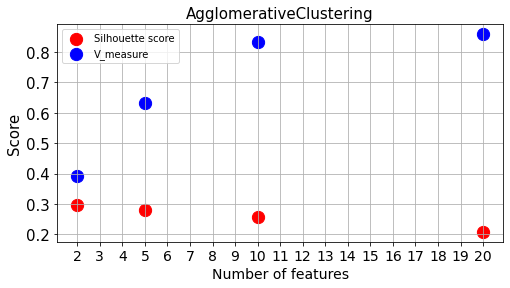

In [23]:
plt.figure(figsize=(8,4))
plt.title('AgglomerativeClustering', fontsize=15)
plt.scatter(x=[2, 5, 10, 20],y=svd_x_silhouette_agg,s=150, color = 'r', label='Silhouette score')
plt.scatter(x=[2, 5, 10, 20],y=v_measure_svd_agg,s=150, color = 'b', label='V_measure')
plt.grid(True)
plt.xlabel("Number of features",fontsize=14)
plt.ylabel("Score",fontsize=15)
plt.xticks([i for i in range(2,21)],fontsize=14)
plt.legend()
plt.yticks(fontsize=15)

plt.show()

____
    Скалирование не повляло на результат.
    Лучшие показатели:
    v_measure для алгоритама Kmeans 0.745, количество признаков 20
    silhouette для алгоритама Kmeans 0.391, количество признаков 2
    
    v_measure для алгоритама AgglomerativeClustering 0.8577,количество признаков 20
    silhouette для алгоритама AgglomerativeClustering 0.3908,количество признаков 2
    
    Все метрики хуже, чем на исходных данных
_____

* Выполните tSNE-преобразование матрицы X, оставив 2 признака. Визуализируйте данные, преобразованные таким образом, в виде точечной диаграммы: первый признак вдоль горизонтальной оси, второй признак вдоль вертикальной оси. Подсветите разными цветами группы точек, соответствующих разным цифрам.

In [24]:
x = X_scaled

In [25]:
x_tsne = TSNE(n_components=2).fit_transform(X_scaled)

In [26]:
x_tsne.shape

(1797, 2)

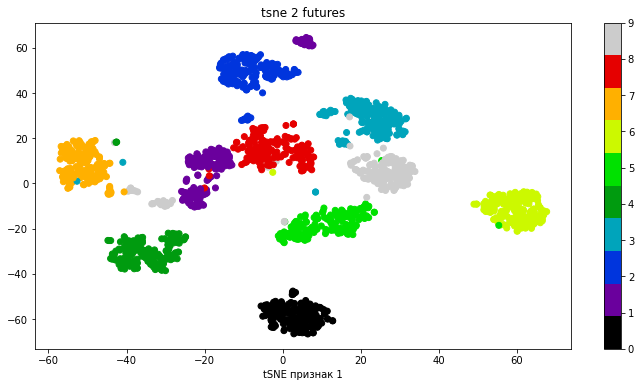

In [27]:
fig, axs =plt.subplots(figsize=(12,6))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y, 
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()


plt.xlabel("tSNE признак 0")
plt.xlabel("tSNE признак 1")
plt.title('tsne 2 futures');

* Для tSNE-преобразованных данных с 2 признаками выполните иерархическую и 𝐾-means кластеризацию (число кластеров примите равным 10). Посчитайте значения силуэта и 𝑉-меры. Удалось ли получить силуэт и / или 𝑉-меру лучше, чем на исходных данных?

In [28]:
km = KMeans(n_clusters=10, random_state=0).fit(x_tsne)
preds = km.predict(x_tsne)
silhouette = silhouette_score(x_tsne, preds)
v_measure = v_measure_score(y, preds)
print("Silhouette score {}".format(silhouette))
print("v_measure score {}".format(v_measure))

Silhouette score 0.6487438678741455
v_measure score 0.9129932687323957


In [29]:
clustering = AgglomerativeClustering(n_clusters = 10).fit(x_tsne)
predict = clustering.fit_predict(x_tsne)
silhouette = silhouette_score(x_tsne, predict)
v_measure = v_measure_score(y, predict)
print("Silhouette score : {}".format(silhouette))
print("v_measure score : {}".format(v_measure))

Silhouette score : 0.6470820307731628
v_measure score : 0.9116073483751751


 ____   
    Алгоритм KMeans с tSNE преобразованием показал лучшие результаты:
    На нескалтрованных данных:
    v_measure 0.9067
    silhouette 0.638
    На скалированных данных:
    v_measure 0.879
    silhouette 0.647
 _____

* Для самого лучшего разбиения, которое вам удалось получить (на ваше усмотрение, лучшего в терминах силуэта или 𝑉-меры), опять визуализируйте картинками центры кластеров. Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?

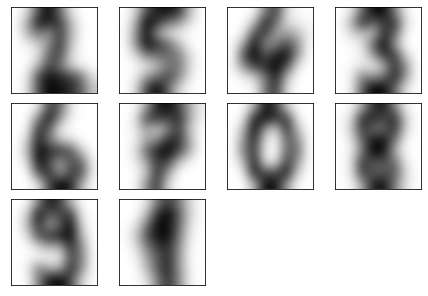

In [30]:
km = KMeans(n_clusters=10, random_state=0).fit(x_tsne)
preds = km.predict(x_tsne)

plt.figure(figsize=(6, 4), constrained_layout=True)
for i in range(0, 10):
    plt.subplot(3, 4, i + 1, xticks = [], yticks = [])
    plt.imshow(np.mean(x[preds==i],axis=0).reshape(8,8),  interpolation= 'bicubic', cmap=plt.cm.gray_r); 

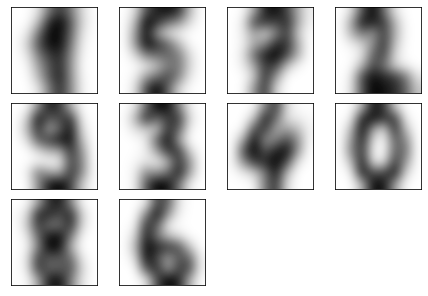

In [31]:
clustering = AgglomerativeClustering(n_clusters = 10).fit(x_tsne)
predict = clustering.fit_predict(x_tsne)

plt.figure(figsize=(6, 4), constrained_layout=True)
for i in range(0, 10):
    plt.subplot(3, 4, i + 1, xticks = [], yticks = [])
    plt.imshow(np.mean(x[predict==i],axis=0).reshape(8,8),  interpolation= 'bicubic', cmap=plt.cm.gray_r); 

### 4. Итоги

Напишите в свободной форме, какие выводы вы сделали из выполненной работы. Ответьте, как минимум, на следующие два вопроса:

    Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм 𝐾 средних? 
    Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?
    Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?

* В данной работе, сложно оценить приимущества того или иного метода кластерезации, оба метода показали приблизительно одинаковые  результаты.
* Явно можно выделить что, при tSNE преобразовании все метри возратсают. 


In [44]:
from scipy.stats import mode

labels = np.zeros_like(preds )
for i in range(10):
    mask = (preds  == i)
    labels[mask] = mode(y[mask])[0]

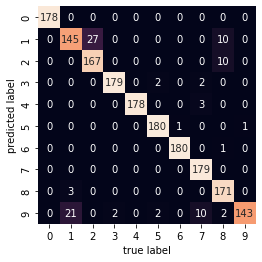

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
corr = confusion_matrix(y, labels)
sns.heatmap(corr, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');